<a href="https://colab.research.google.com/github/suhacker1/nn-training/blob/lessonone/Lesson_One.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction 
We presume a CS 1301-level understanding of Python. This notebook will cover the very essentials of neural networks and Pytorch. Before you can begin to understand the given code, it is important that you have a solid understanding of the mechanics of neural networks and convolutions. Hence, watch the videos and visit the link provided in this section. Yeet. 

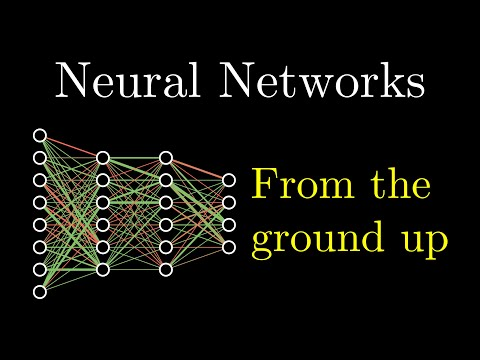

In [0]:
from IPython.display import YouTubeVideo
YouTubeVideo("aircAruvnKk")

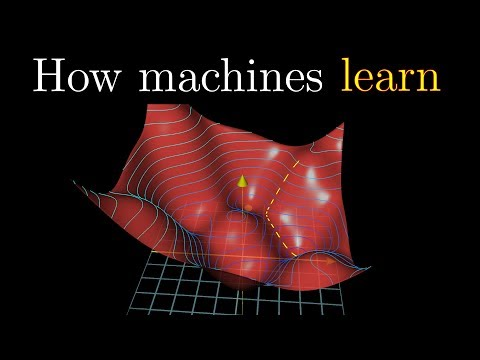

In [0]:
YouTubeVideo("IHZwWFHWa-w")

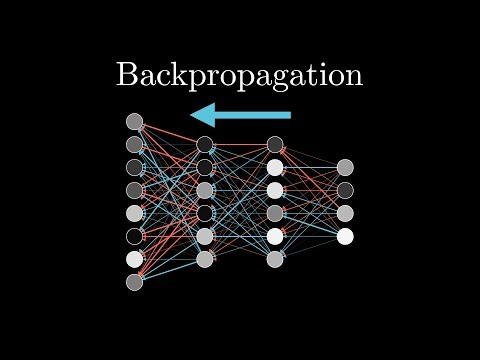

In [0]:
YouTubeVideo("Ilg3gGewQ5U")

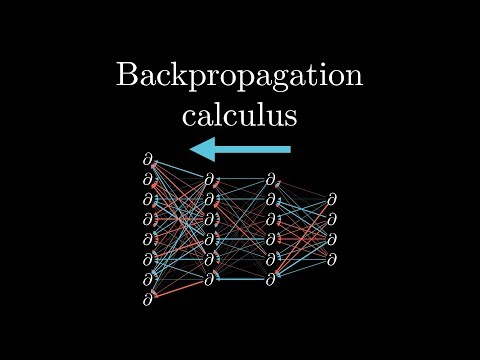

In [0]:
YouTubeVideo("tIeHLnjs5U8")

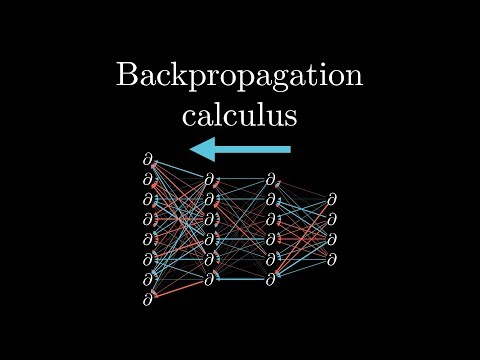

In [0]:
YouTubeVideo("tIeHLnjs5U8")

Now, [work on the PyTorch 60 minute blitz.](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)

# Neural Network for KMNIST

We're going to be utilizing PyTorch to build a simple classifier for the KMNIST dataset- a collection of images of Hiranga characters. 

Go to 'Runtime' and 'Change Runtime Type' to run this code on a GPU from Google. Make sure to carefully read the comments. 

In [0]:
device = 'cuda' #Enables GPU use
!pip3 install torch torchvision


#Dependencies 
import numpy as np
import matplotlib.pyplot as plt
import torch 
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import KMNIST
from torch.utils.data import DataLoader

Knowing what you already know about neural networks, why do you think the code in the cell below is important? 

In [0]:
#Set seeds for reproducibility 
torch.manual_seed(42042069)
np.random.seed(42042069)

In [0]:
#Define transformations; Convert data to tensors and normalize 
train_transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize([0.1307], [0.3081])])
valid_transform = train_transform

In [0]:
#Download KMNIST data
train_set = KMNIST('./data/kmnist', train=True, download=True, transform=train_transform)
valid_set = KMNIST('./data/kmnist', train=False, download=True, transform=valid_transform)

  0%|          | 0/18165135 [00:00<?, ?it/s]

18169856it [00:02, 6951652.86it/s]                              


Extracting ./data/kmnist/KMNIST/raw/train-images-idx3-ubyte.gz


32768it [00:00, 284949.15it/s]                           
0it [00:00, ?it/s]

Extracting ./data/kmnist/KMNIST/raw/train-labels-idx1-ubyte.gz


3047424it [00:00, 5062569.13it/s]                            
8192it [00:00, 103547.14it/s]


Extracting ./data/kmnist/KMNIST/raw/t10k-images-idx3-ubyte.gz
Extracting ./data/kmnist/KMNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [0]:
#Print shapes of the dataset
print(train_set.train_data.shape)
print(valid_set.test_data.shape)


torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


tensor(7)


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


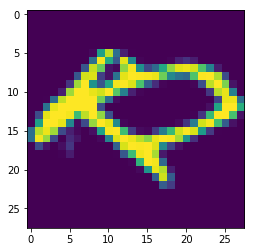

In [0]:
#Display a single digit
plt.figure()
plt.imshow(train_set.train_data[20])
print(train_set.train_labels[20])

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


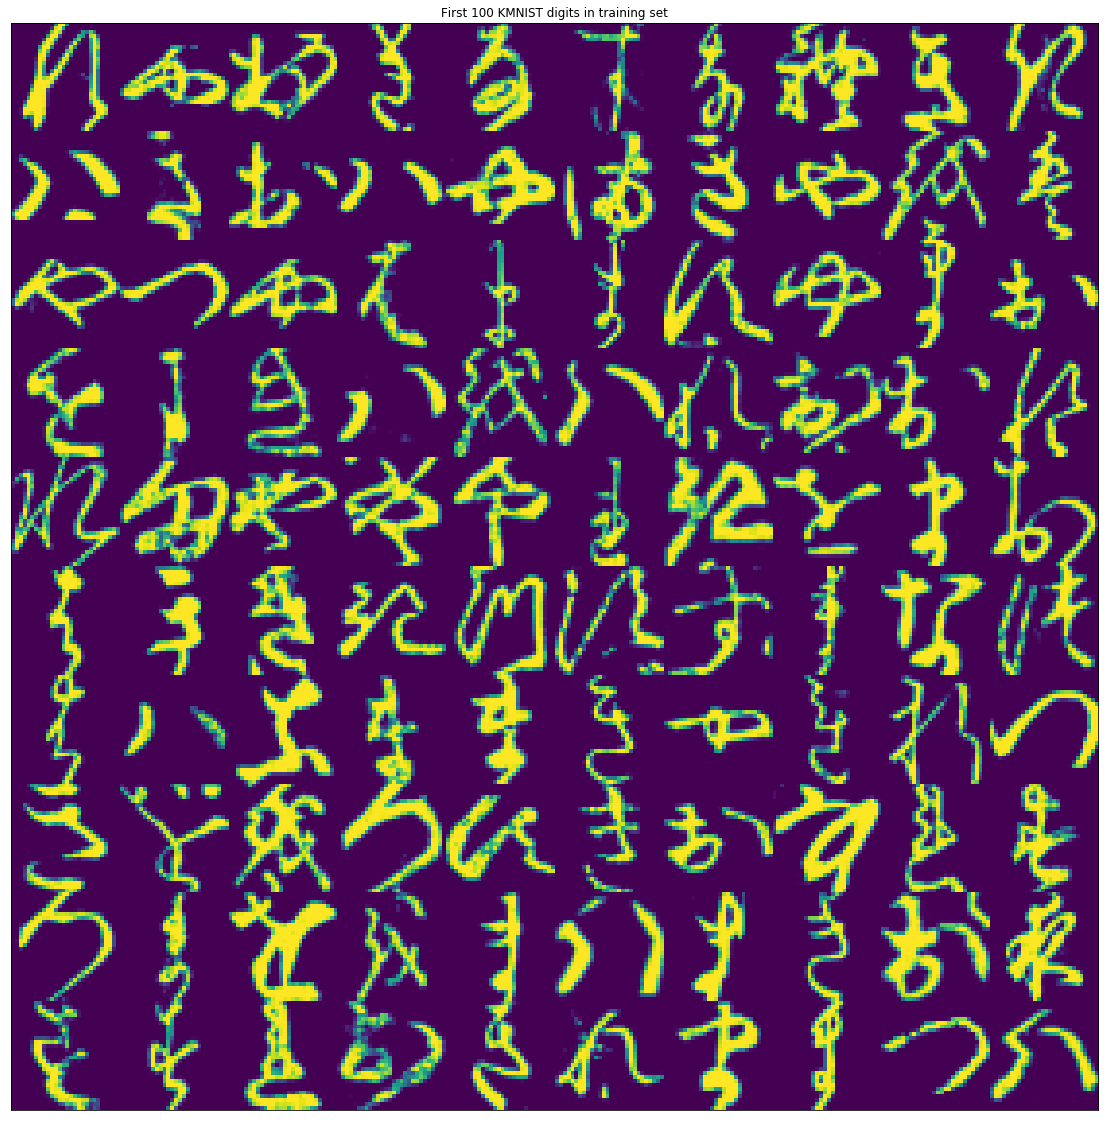

Labels: [8 7 0 1 4 2 4 8 1 1 5 1 0 5 7 6 1 7 9 5 7 3 7 5 6 6 2 7 6 0 9 6 1 5 9 5 8
 0 0 8 8 6 7 7 7 8 1 9 6 0 5 1 1 1 3 2 2 6 4 3 5 5 4 6 6 1 7 8 8 3 1 9 9 3
 2 1 0 4 8 2 3 6 9 9 6 5 6 1 0 7 2 2 8 0 1 8 6 6 3 5]


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


In [0]:
plt.figure(figsize=(20,20))

sample = train_set.train_data[:100]
# shape (64, 28, 28)
sample = sample.reshape(10,10,28,28)
# shape (8, 8, 28, 28)
sample = sample.permute(0,2,1,3)
# shape (8, 28, 8, 28)
sample = sample.reshape(10*28,10*28)
# shape (8*28, 8*28)
plt.imshow(sample)
plt.xticks([])
plt.yticks([])
plt.grid(True)
plt.title('First 100 KMNIST digits in training set')
plt.show()

print('Labels:', train_set.train_labels[:100].numpy())

In [0]:
#Initialize data loaders
train_loader = DataLoader(train_set, batch_size=269, num_workers=0, shuffle=True)
valid_loader = DataLoader(valid_set, batch_size=690, num_workers=0, shuffle=False)


In [0]:
#Create neural network
class Mendes_NN(nn.Module):
  
  def __init__(self, num_channels=1, num_classes=10):
    super(Mendes_NN, self).__init__()
    hidden_1 = 420 
    hidden_2 = 420
    hidden_3 = 420
    self.fc1 = nn.Linear(28 * 28, hidden_1)
    self.fc2 = nn.Linear(hidden_1, hidden_2)
    self.fc3 = nn.Linear(hidden_2, hidden_3)
    self.fc4 = nn.Linear(hidden_3, 10)
    self.dropout = nn.Dropout(0.4)
    
  def forward(self, x):
    x = x.view(-1, 28 * 28)
    x = F.relu(self.fc1(x))
    x = self.dropout(x)
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.dropout(x)
    x = self.fc4(x)
    return x #logits
    

In [0]:
#Elucidates progress
class AverageBase(object):
    
    def __init__(self, value=0):
        self.value = float(value) if value is not None else None
       
    def __str__(self):
        return str(round(self.value, 4))
    
    def __repr__(self):
        return self.value
    
    def __format__(self, fmt):
        return self.value.__format__(fmt)
    
    def __float__(self):
        return self.value
    

class RunningAverage(AverageBase):
    """
    Keeps track of a cumulative moving average (CMA).
    """
    
    def __init__(self, value=0, count=0):
        super(RunningAverage, self).__init__(value)
        self.count = count
        
    def update(self, value):
        self.value = (self.value * self.count + float(value))
        self.count += 1
        self.value /= self.count
        return self.value


class MovingAverage(AverageBase):
    """
    An exponentially decaying moving average (EMA).
    """
    
    def __init__(self, alpha=0.99):
        super(MovingAverage, self).__init__(None)
        self.alpha = alpha
        
    def update(self, value):
        if self.value is None:
            self.value = float(value)
        else:
            self.value = self.alpha * self.value + (1 - self.alpha) * float(value)
        return self.value


from IPython.display import HTML, display

#Creates a progress bar 
class ProgressMonitor(object):
    """
    Custom IPython progress bar for training
    """
    
    tmpl = """
        <p>Loss: {loss:0.4f}   {value} / {length}</p>
        <progress value='{value}' max='{length}', style='width: 100%'>{value}</progress>
    """

    def __init__(self, length):
        self.length = length
        self.count = 0
        self.display = display(self.html(0, 0), display_id=True)
        
    def html(self, count, loss):
        return HTML(self.tmpl.format(length=self.length, value=count, loss=loss))
        
    def update(self, count, loss):
        self.count += count
        self.display.update(self.html(self.count, loss))
        

#Creates checkpoints for the model 
def save_checkpoint(optimizer, model, epoch, filename):
    checkpoint_dict = {
        'optimizer': optimizer.state_dict(),
        'model': model.state_dict(),
        'epoch': epoch
    }
    torch.save(checkpoint_dict, filename)


def load_checkpoint(optimizer, model, filename):
    checkpoint_dict = torch.load(filename)
    epoch = checkpoint_dict['epoch']
    model.load_state_dict(checkpoint_dict['model'])
    if optimizer is not None:
        optimizer.load_state_dict(checkpoint_dict['optimizer'])
    return epoch

In [0]:
#Initialize neural network
model = Mendes_NN()
model.to(device)

Mendes_NN(
  (fc1): Linear(in_features=784, out_features=420, bias=True)
  (fc2): Linear(in_features=420, out_features=420, bias=True)
  (fc3): Linear(in_features=420, out_features=420, bias=True)
  (fc4): Linear(in_features=420, out_features=10, bias=True)
  (dropout): Dropout(p=0.4)
)

In [0]:
#Utilizes the Adadelta algorithm for optimization
optimizer = optim.Adadelta(model.parameters(), lr=0.01)

In [0]:
!mkdir -p checkpoints

In [0]:
#Creates a function for training the model 
def train(optimizer, model, num_epochs=9, first_epoch=1 ):
  
  criterion = nn.CrossEntropyLoss()
  
  train_losses = []
  valid_losses = []
  
  for epoch in range(first_epoch, first_epoch + num_epochs):
    print("Epoch", epoch)
    
    #training phase
    
    model.train()
    
    #create a progress bar
    progress = ProgressMonitor(length=len(train_set))
    
    train_loss = MovingAverage()
    
    for batch, targets in train_loader:
      
      #Move to GPU 
      batch = batch.to(device)
      targets = targets.to(device)
      
      #clear out 
      optimizer.zero_grad()
      
      #run forward prop
      predictions = model(batch)
      
      #calculate loss 
      loss = criterion(predictions, targets)
      
      #backprop
      loss.backward()
      
      #update parameters
      optimizer.step()
      
      #update average loss
      train_loss.update(loss)
      
      #update progress bar
      progress.update(batch.shape[0], train_loss)
      
    print('Training loss:', train_loss)
    train_losses.append(train_loss.value)
    
    
    #validation phase
    model.eval()
    
    valid_loss = RunningAverage()
    
    #keep track of predictions'
    y_pred = []
    
    
    with torch.no_grad():
      
      for batch, targets in valid_loader:
        
        #Move to GPU 
        batch = batch.to(device)
        targets = targets.to(device)

        #clear out 
        optimizer.zero_grad()

        #running forward prop
        predictions = model(batch)

        #calculate loss 
        loss = criterion(predictions, targets)

        #update average loss
        valid_loss.update(loss)
        
        y_pred.extend(predictions.argmax(dim=1).cpu().numpy())
        
    print('validation loss', valid_loss)
    valid_losses.append(valid_loss.value)
    
    #Calculate validation accuracy 
    y_pred = torch.tensor(y_pred, dtype=torch.int64)
    accuracy = torch.mean((y_pred == valid_set.test_labels).float())
    print('Validation accuracy: {:.4f}%'.format(float(accuracy) * 100))
    
    # Save a checkpoint
    checkpoint_filename = 'checkpoints/kmnist-{:03d}.pkl'.format(epoch)
    save_checkpoint(optimizer, model, epoch, checkpoint_filename)
    
  return train_losses, valid_losses, y_pred


        
        

In [0]:
train_losses, valid_losses, y_pred = train(optimizer, model, num_epochs=10) #Train

Epoch 1


Training loss: 2.2468
validation loss 2.2137
Validation accuracy: 32.4700%
Epoch 2


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Training loss: 1.9499
validation loss 1.8951
Validation accuracy: 44.2100%
Epoch 3


Training loss: 1.4226
validation loss 1.5445
Validation accuracy: 52.7200%
Epoch 4


Training loss: 1.0816
validation loss 1.3317
Validation accuracy: 58.5200%
Epoch 5


Training loss: 0.8994
validation loss 1.1862
Validation accuracy: 63.2100%
Epoch 6


Training loss: 0.7855
validation loss 1.0983
Validation accuracy: 65.0700%
Epoch 7


Training loss: 0.7255
validation loss 1.0373
Validation accuracy: 66.8500%
Epoch 8


Training loss: 0.6628
validation loss 0.977
Validation accuracy: 68.6800%
Epoch 9


Training loss: 0.6364
validation loss 0.9383
Validation accuracy: 69.6600%
Epoch 10


Training loss: 0.5846
validation loss 0.897
Validation accuracy: 70.7600%


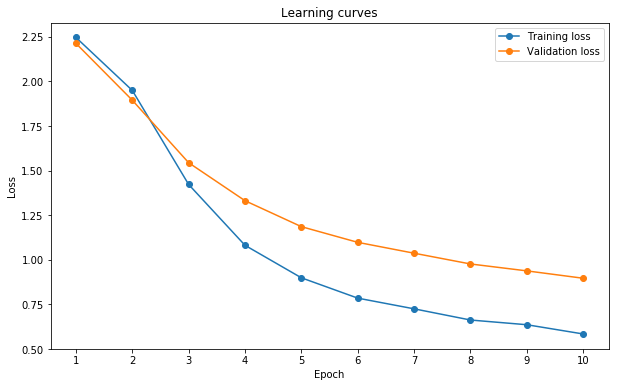

In [0]:
#Graph training and validation loss
epochs = range(1, len(train_losses) + 1)

plt.figure(figsize=(10,6))
plt.plot(epochs, train_losses, '-o', label='Training loss')
plt.plot(epochs, valid_losses, '-o', label='Validation loss')
plt.legend()
plt.title('Learning curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(epochs)
plt.show()

#Exercises 
There are no exact solutions to the exercises below. If you are correct, you have made the requested change and your code will run correctly and similarly to the previous run. 
1.   Replace the KMNIST dataset with the Fashion-MNIST dataset. 
2.   Implement [named tensors](https://pytorch.org/blog/pytorch-1-dot-3-adds-mobile-privacy-quantization-and-named-tensors/) in the code above. 
3.   Add 3 other transformations. 
4.   Replace the layers of Mendes-NN with convolutions. 


